## Project 3 — Antibiotic Resistance Prediction Dashboard
Description

This project simulates how microbial taxa might respond to antibiotic exposure using abundance as an indirect indicator of resistance.
By applying log transformations, thresholds, and ternary logic, it classifies each species as Resistant, Intermediate, or Sensitive based on abundance patterns.
It then visualizes the distribution of resistance categories.


🔬 Top 10 Predicted Resistant Taxa:
                                              Taxonomy  Resistance_Score
0   g__Faecalibacterium;s__Faecalibacterium prausn...          6.588355
2        g__Clostridium;s__uncultured Clostridium sp.          6.355276
1               g__Hungatella;s__Hungatella hathewayi          6.298094
6             g__Clostridium;s__Clostridium sp. CAG:7          5.563672
9   g__Butyricicoccus;s__uncultured Butyricicoccus...          5.474191
18  g__Flavonifractor;s__uncultured Flavonifractor...          5.252051
32      g__Lachnoclostridium;s__[Clostridium] bolteae          5.131267
22  g__Phascolarctobacterium;s__Phascolarctobacter...          5.111087
61             g__Bacteroides;s__Bacteroides fragilis          5.079774
30     g__Ruminococcus;s__uncultured Ruminococcus sp.          5.051530

✅ Saved advanced_antibiotic_resistance_report.csv


C:\Users\Moon\AppData\Local\Temp\ipykernel_16264\3181465865.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


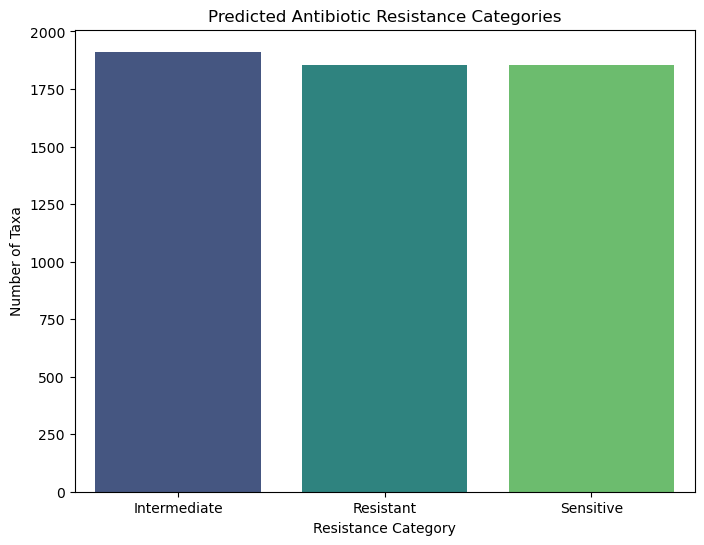

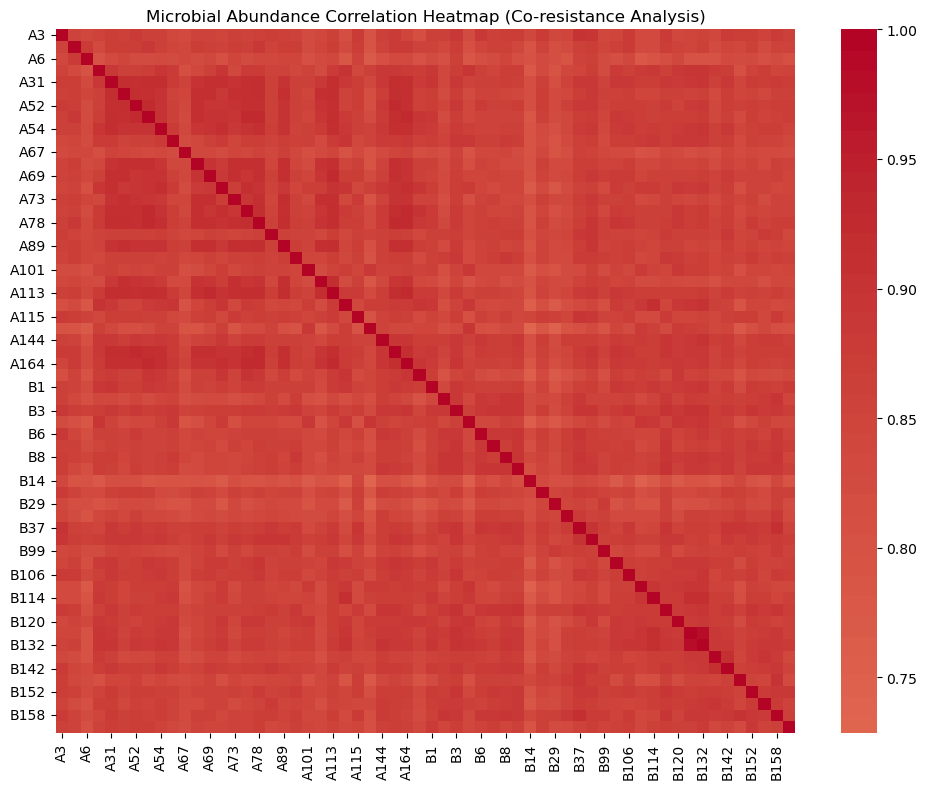

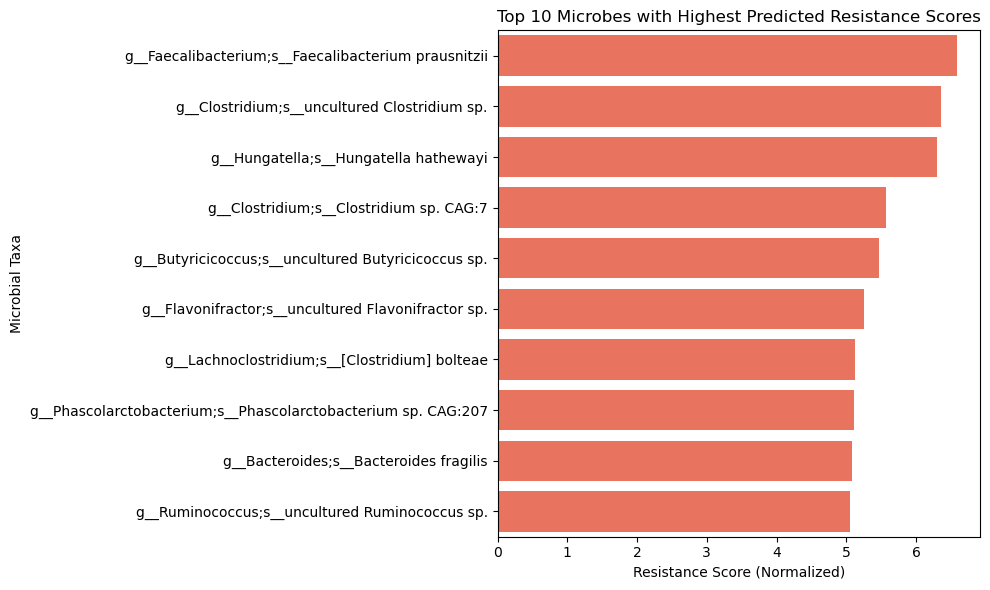

In [3]:
# 💊 Advanced Antibiotic Resistance Prediction Dashboard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load microbiome dataset
df = pd.read_csv("Micro_Data.csv")

# Extract numeric abundance data
abundance = df.drop(columns=["Taxonomy"])

# --- Step 1: Data Normalization ---
# Apply log transformation to stabilize variance
log_abundance = np.log1p(abundance)
# Standardize (z-score normalization)
z_abundance = (log_abundance - log_abundance.mean()) / log_abundance.std()

# --- Step 2: Compute Mean Resistance Indicator ---
# Simulated "resistance score" = average normalized abundance across samples
df["Resistance_Score"] = z_abundance.mean(axis=1)

# --- Step 3: Classification Logic ---
# Define thresholds based on quantiles
low_thr = df["Resistance_Score"].quantile(0.33)
high_thr = df["Resistance_Score"].quantile(0.67)

def classify_resistance(score):
    """Classify microbes based on resistance score."""
    return (
        "Sensitive" if score < low_thr else
        ("Intermediate" if score < high_thr else "Resistant")
    )

df["Resistance_Category"] = df["Resistance_Score"].apply(classify_resistance)

# --- Step 4: Identify most resistant taxa ---
top_resistant = df.nlargest(10, "Resistance_Score")[["Taxonomy", "Resistance_Score"]]
print("\n🔬 Top 10 Predicted Resistant Taxa:\n", top_resistant)

# --- Step 5: Correlation Matrix ---
corr_matrix = z_abundance.corr()

# --- Step 6: Save and Export ---
df.to_csv("advanced_antibiotic_resistance_report.csv", index=False)
print("\n✅ Saved advanced_antibiotic_resistance_report.csv")

# --- Step 7: Visualizations ---
# A) Distribution of resistance categories
plt.figure(figsize=(8,6))
counts = df["Resistance_Category"].value_counts()
sns.barplot(x=counts.index, y=counts.values, palette="viridis")
plt.title("Predicted Antibiotic Resistance Categories")
plt.ylabel("Number of Taxa")
plt.xlabel("Resistance Category")
plt.show()

# B) Correlation heatmap of sample abundance (simulating co-resistance)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Microbial Abundance Correlation Heatmap (Co-resistance Analysis)")
plt.tight_layout()
plt.show()

# C) Top resistant taxa bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=top_resistant, x="Resistance_Score", y="Taxonomy", color="tomato")
plt.title("Top 10 Microbes with Highest Predicted Resistance Scores")
plt.xlabel("Resistance Score (Normalized)")
plt.ylabel("Microbial Taxa")
plt.tight_layout()
plt.show()
